In [1]:
import os
os.getcwd()   #show current working directory

'F:\\Machine-learning\\Assignments'

In [2]:
os.chdir("F:\\Machine-learning\\Assignments\\data_set")  #change current working directory
os.getcwd()

'F:\\Machine-learning\\Assignments\\data_set'

In [3]:
import pandas as pd
df = pd.read_csv("Height-Weight Data.csv")  #import DataFrame 
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671


In [4]:
df.shape    #show row and column size 

(3501, 2)

In [5]:
df.head()   #show top (front data) five data by default, we can pass parameter what we want to see

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [6]:
df.tail()  #lowest ((footer data)) five data

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [7]:
df.sample(3)  #random selection

,Height,Weight
3113,68.128991,177.897336
3042,64.579717,156.917314
486,71.209194,196.145506


# data visualization

In [8]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Weight')

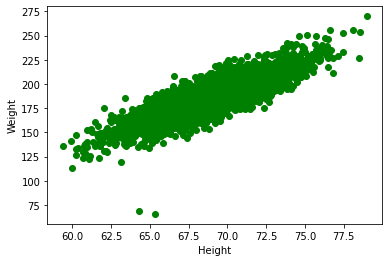

In [9]:
plt.scatter(df["Height"], df["Weight"], color="green")  #for scatter plotting, x-axis = Height, y-axis = Weight
plt.xlabel("Height")
plt.ylabel("Weight")

In [10]:
df['Height'].mean()

69.02441087268781

In [11]:
df['Weight'].mean()

186.891257979463

In [12]:
x = df[['Height']]
y = df['Weight']

In [13]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [14]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

# Separate training and testing data

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.3, random_state=1)

In [16]:
xtrain.head()  #70% training data for Height

,Height
221,66.786927
2696,65.192862
1334,68.390109
3402,68.145621
1159,71.647580


In [17]:
ytrain.head()  #and 70% associative Weight(y) training data for Height(x)

221     165.431242
2696    185.348211
1334    179.352182
3402    197.476930
1159    200.286509
Name: Weight, dtype: float64

# Model fit


In [18]:
from sklearn.linear_model import LinearRegression
lrg = LinearRegression()

In [19]:
lrg.fit(xtrain, ytrain)  #model training

LinearRegression()

In [20]:
lrg.coef_   #slope, m

array([5.97744946])

In [21]:
lrg.intercept_  #intercept, c

-225.82603000755844

In [22]:
# y = mx + c
m = lrg.coef_
c = lrg.intercept_
x = 66.786927
y = m*x + c

print(y)

[173.38945084]


In [23]:
lrg.predict([ [66.786927] ])

C:\Users\sabbi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([173.38945084])

In [24]:
df['pred_weight'] = lrg.predict(df[['Height']])  #add pred_weight column in our dataframe, contains predicted weight of height

In [25]:
df.head(10)

,Height,Weight,pred_weight
0,73.847017,241.893563,215.590782
1,68.781904,162.310473,185.314325
2,74.110105,212.740856,217.163380
3,71.730978,220.042470,202.942268
4,69.881796,206.349801,191.888873
5,67.253016,152.212156,176.175472
6,68.785081,183.927889,185.333317
7,68.348516,167.971111,182.723767
8,67.018950,175.929440,174.776355
9,63.456494,156.399676,153.481956


In [26]:
lrg.score(xtest, ytest)  # R-squared values range from 0 to 1

0.7313258168853622

# Best fit line

Text(0, 0.5, 'Weight')

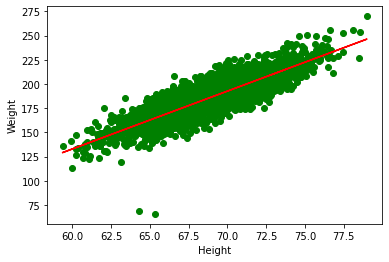

In [27]:
plt.plot(df["Height"], lrg.predict(df[['Height']]), color='red')  # line plot

plt.scatter(df["Height"], df["Weight"], color="green")  #for scatter plotting, x-axis = Height, y-axis = Weight

plt.xlabel("Height")
plt.ylabel("Weight")

# Save/Open ML models

In [28]:
import pickle as pk

with open('linear_regression_Model', 'wb') as files:  # save model or write binary file into directory
    pk.dump(lrg, files)                               # lrg = model's object name

In [29]:
with open("linear_regression_Model", "rb") as files:  # Now, rb = read binary file
    model = pk.load(files)

In [30]:
model.predict([ [66.786927] ])

C:\Users\sabbi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([173.38945084])

### shortcut, in one line

In [31]:
pk.dump(lrg, open('linear_regression_Model2', 'wb'))

In [32]:
model2 = pk.load(open('linear_regression_Model2', 'rb'))

In [33]:
model2.predict([ [66.786927] ])

C:\Users\sabbi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([173.38945084])

### another method using joblib

In [34]:
import joblib as jb
jb.dump(lrg, 'linear_regression_Model_3')

['linear_regression_Model_3']

In [35]:
model3 = jb.load('linear_regression_Model_3')

In [36]:
model3.predict([ [66.786927] ])

C:\Users\sabbi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([173.38945084])